##### Model Training

1.1 Import required packages

In [2]:
import numpy as np
import pandas as pd

# Modeling
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

# Evaluation metrics
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, mean_absolute_error

from sklearn.model_selection import train_test_split


Import csv data as pd dataframe

In [3]:
df = pd.read_csv('StudentsPerformance.csv')

In [4]:
#Replace the column names with more readable ones

df.columns =df.columns.str.replace(' ', '_')
df.columns =df.columns.str.replace('/', '_')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
X = df.drop(columns=['math_score'], axis=1)
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [6]:
y = df['math_score']
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [7]:
num_features = X.select_dtypes(exclude=['object']).columns
cat_features = X.select_dtypes(include=['object']).columns

In [8]:
from pandas import get_dummies
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer

#encode categorical features
label_encoder = LabelEncoder()
for col in cat_features:
    # X = pd.get_dummies(X, columns=[col])
    X[col] = label_encoder.fit_transform(X[col])

# Normalize numerical features
standard_scaler = StandardScaler()
for col in num_features:
    X[[col]] = standard_scaler.fit_transform(X[[col]])



In [9]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   int64  
 1   race_ethnicity               1000 non-null   int64  
 2   parental_level_of_education  1000 non-null   int64  
 3   lunch                        1000 non-null   int64  
 4   test_preparation_course      1000 non-null   int64  
 5   reading_score                1000 non-null   float64
 6   writing_score                1000 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 54.8 KB


In [10]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,0,1,1,1,1,0.193999,0.391492
1,0,2,4,1,0,1.427476,1.313269
2,0,1,3,1,1,1.770109,1.642475
3,1,0,0,0,1,-0.833899,-1.583744
4,1,2,4,1,1,0.605158,0.457333


In [11]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((800, 7), (200, 7))

In [12]:
from sklearn.ensemble import AdaBoostRegressor


models={
    'LinearRegression': LinearRegression(),
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'RandomForestRegressor': RandomForestRegressor(),
    'DecisionTreeRegressor': DecisionTreeRegressor(),
    'KNeighborsRegressor': KNeighborsRegressor(),
    'XGBRegressor': XGBRegressor(),
    'CatBoostRegressor': CatBoostRegressor(verbose=0),
    'AdaboostRegressor': AdaBoostRegressor(),
    'SVR': SVR()
}

In [13]:
def evaluate_model(true_value, predicted_value):
    rmse = np.sqrt(mean_squared_error(true_value, predicted_value))
    r2 = r2_score(true_value, predicted_value)
    mae = mean_absolute_error(true_value, predicted_value)
    return rmse, r2, mae

In [14]:
model_list = []
r2_scores = []
for i in range(len(models)):
    model =list(models.values())[i]
    model.fit(X_train, y_train)

    # Training predictions(for evaluation)
    y_train_pred = model.predict(X_train)

    # Testing predictions(actual use)
    y_test_pred = model.predict(X_test)

    # Evaluation metrics for Training and Test dataset
    rmse_train, r2_train, mae_train = evaluate_model(y_train, y_train_pred)
    rmse_test, r2_test, mae_test = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model Performance on Training Data:')
    print("Root Mean Squared Error: {:.4f}".format(rmse_train) )
    print('R^2 Score: {:.4f}'.format(r2_train))
    print('Mean Absolute Error: {:.4f}'.format(mae_train))
    print('-' * 30)
    
    print('Model Performance on Test Data:')
    print("Root Mean Squared Error: {:.4f}".format(rmse_test))
    print("R^2 Score: {:.4f}".format(r2_test))
    print("Mean Absolute Error: {:.4f}".format(mae_test))
    print('=' * 50,'\n')
    r2_scores.append(r2_test)

LinearRegression
Model Performance on Training Data:
Root Mean Squared Error: 5.5876
R^2 Score: 0.8615
Mean Absolute Error: 4.4947
------------------------------
Model Performance on Test Data:
Root Mean Squared Error: 5.3175
R^2 Score: 0.8838
Mean Absolute Error: 4.1301

LogisticRegression
Model Performance on Training Data:
Root Mean Squared Error: 8.0859
R^2 Score: 0.7100
Mean Absolute Error: 6.1750
------------------------------
Model Performance on Test Data:
Root Mean Squared Error: 8.6348
R^2 Score: 0.6936
Mean Absolute Error: 6.4800

RandomForestRegressor
Model Performance on Training Data:
Root Mean Squared Error: 2.3271
R^2 Score: 0.9760
Mean Absolute Error: 1.8505
------------------------------
Model Performance on Test Data:
Root Mean Squared Error: 6.0692
R^2 Score: 0.8486
Mean Absolute Error: 4.7182

DecisionTreeRegressor
Model Performance on Training Data:
Root Mean Squared Error: 0.2795
R^2 Score: 0.9997
Mean Absolute Error: 0.0187
------------------------------
Model P

In [15]:
pd.DataFrame({
    'Model': model_list,
    'R^2 Score': r2_scores
}).sort_values(by='R^2 Score', ascending=False).reset_index(drop=True)

,Model,R^2 Score
0,LinearRegression,0.883803
1,AdaboostRegressor,0.849232
2,CatBoostRegressor,0.848694
3,RandomForestRegressor,0.848628
4,XGBRegressor,0.824909
5,KNeighborsRegressor,0.781113
6,DecisionTreeRegressor,0.719547
7,SVR,0.716723
8,LogisticRegression,0.693595


Choosing Linear regression

In [16]:
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
print("Linear Regression Model Performance:")
rmse, r2, mae = evaluate_model(y_test, y_pred)
print("Root Mean Squared Error: {:.4f}".format(rmse))
print("R^2 Score: {:.4f}".format(r2))
print("Mean Absolute Error: {:.4f}".format(mae))

Linear Regression Model Performance:
Root Mean Squared Error: 5.3175
R^2 Score: 0.8838
Mean Absolute Error: 4.1301


Text(0.5, 1.0, 'Actual vs Predicted Values')

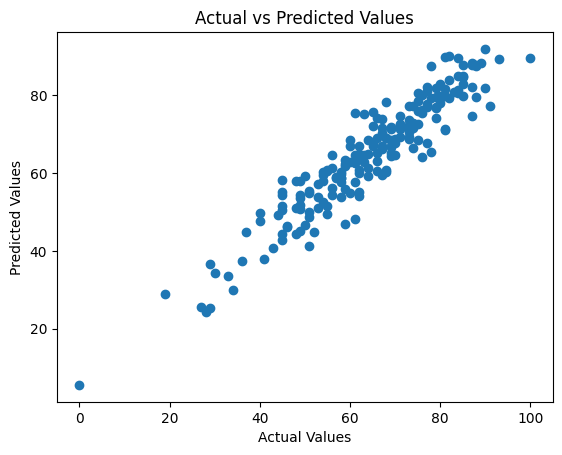

In [17]:
from matplotlib import pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')

<Axes: xlabel='math_score'>

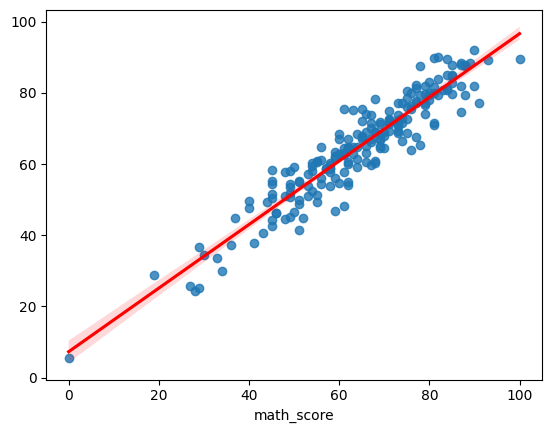

In [23]:
import seaborn as sns
sns.regplot(x=y_test, y=y_pred, line_kws={"color": "red"})